In [1]:
import sys
sys.path.append('..')

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shutil
import importlib

%matplotlib inline
from sklearn.datasets import load_files
import pandas as pd
pd.set_option("display.max_colwidth", 75)

The file sizes are calculated by running ```identify``` command on the data directory and processing the output
Theo output is processed to get only the image size and size on disk using the command

```cat file_size_identify.txt |cut -d" " -f3,7 > filesize.txt```

In [ ]:
There are few grayscale and sRBG images which have a different format

In [47]:
# images with color attribute
!cat  file_size_identify.txt |cut -d" " -f3,7-|grep c > withcolor.txt
!wc -l withcolor.txt

833 withcolor.txt


In [48]:
# images without color attribute
!cat  file_size_identify.txt |cut -d" " -f3,7-|grep -v c > withoutcolor.txt
!wc -l withoutcolor.txt

469753 withoutcolor.txt


In [53]:
# Grayscale
!cat withcolor.txt |grep "Gray"|tail
!cat withcolor.txt |grep "Gray"|wc -l

400x548 Gray 256c 26.4KB 0.010u 0:00.000
1024x1024 Gray 256c 110KB 0.010u 0:00.010
150x68 Gray 256c 7.36KB 0.000u 0:00.000
566x800 Gray 256c 30.9KB 0.000u 0:00.000
1024x1024 Gray 256c 82.2KB 0.010u 0:00.009
800x1016 Gray 256c 91.8KB 0.010u 0:00.000
1484x1621 Gray 256c 84.8KB 0.010u 0:00.010
427x624 Gray 256c 68.7KB 0.000u 0:00.000
1024x1024 Gray 256c 70.2KB 0.010u 0:00.009
1024x605 Gray 256c 108KB 0.010u 0:00.009
757


In [54]:
# Non Grayscale
!cat withcolor.txt |grep -v "Gray"|tail
!cat withcolor.txt |grep -v "Gray"|wc -l

1024x768 65c 19.2KB 0.000u 0:00.000
607x825 248c 188KB 0.000u 0:00.000
875x875 256c 24.3KB 0.000u 0:00.000
300x225 256c 12.1KB 0.000u 0:00.000
1024x1481 256c 125KB 0.000u 0:00.000
70x80 256c 4.97KB 0.000u 0:00.000
875x483 170c 20.6KB 0.000u 0:00.000
640x263 256c 12.7KB 0.000u 0:00.000
1154x832 256c 32.9KB 0.000u 0:00.000
1200x675 256c 54KB 0.000u 0:00.000
76


In [57]:
# process all regular files
!cat withoutcolor.txt|cut -d" " -f1,2 > filesize.txt


In [58]:
!cat filesize.txt|wc -l

469753


In [61]:
# process grayscale
!cat withcolor.txt |grep "Gray"|cut -d" " -f1,4 > withc_greyscale_filesize.txt
!wc -l withc_greyscale_filesize.txt

757 withc_greyscale_filesize.txt


In [62]:
# process non grayscale with color attribute it them
!cat withcolor.txt |grep -v "Gray"|cut -d" " -f1,3 > withc_nongreyscale_filesize.txt
!wc -l withc_nongreyscale_filesize.txt

76 withc_nongreyscale_filesize.txt


In [63]:
# join them together
!wc -l filesize.txt
!cat withc_greyscale_filesize.txt >> filesize.txt
!cat withc_nongreyscale_filesize.txt >> filesize.txt
!wc -l filesize.txt

469753 filesize.txt
470586 filesize.txt


In [64]:
# number of huge files
!grep "MB" filesize.txt |wc -l

934


In [67]:
# convert MB to KB
!cp filesize.txt filesize.txt.tmp
!grep -v "MB" filesize.txt.tmp > filesize.txt
!grep "MB" filesize.txt.tmp |sed -e "s/MB/KB/g;s/\.//g" >> filesize.txt
!wc -l filesize.txt

470586 filesize.txt


In [76]:
# convert B to KB
!cp filesize.txt filesize.txt.tmp
!grep "KB" filesize.txt.tmp > filesize.txt
!grep -v "KB" filesize.txt.tmp|sed -e "s/B/KB/g;s/\ / 0./g" >> filesize.txt
!wc -l filesize.txt

470586 filesize.txt


In [77]:
!cat filesize.txt|wc -l

470586


In [78]:
# average image width
!cat filesize.txt |cut -d"x" -f1|awk '{sum+=$1}END{print sum/NR}'

945.25


In [79]:
#average height width
!cat filesize.txt |cut -d"x" -f2|cut -d" " -f1|awk '{sum+=$1}END{print sum/NR}'

916.275


In [80]:
# for better analysis this is converted into a csv file
!echo "width,height,size" > filesize.csv
!cat filesize.txt |sed -e "s/ /,/g"|sed -e "s/x/,/g" >> filesize.csv

In [81]:
# find outliers
!grep -v "KB" filesize.csv |tail

width,height,size


In [7]:
# remove KB
!cp filesize.csv filesize.csv.tmp
!cat filesize.csv.tmp |sed -e "s/KB//g" > filesize.csv

In [8]:
img_df = pd.read_csv("filesize.csv")

In [10]:
# height description
img_df.describe()

,width,height,size
count,470586.000000,470586.000000,470586.000000
mean,945.249831,916.275236,142.535236
std,503.529904,556.499248,156.661189
min,4.000000,5.000000,0.361000
25%,600.000000,480.000000,43.000000
50%,768.000000,760.000000,86.100000
75%,1200.000000,1280.000000,176.000000
max,2048.000000,2048.000000,3065.000000


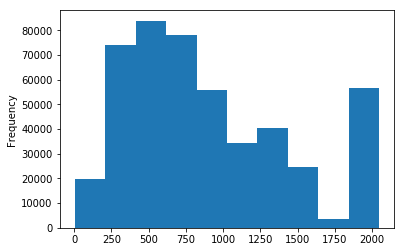

In [15]:
img_df.height.plot(kind='hist')

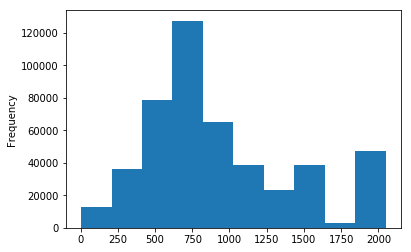

In [16]:
img_df.width.plot(kind='hist')

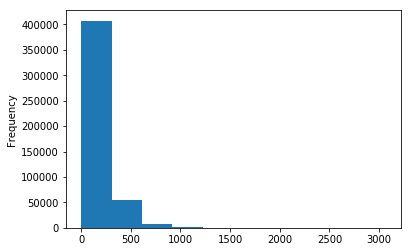

In [18]:
img_df['size'].plot(kind='hist')